In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload your Kaggle API key (kaggle.json)

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ikbalsingh2","key":"5ff38c13268f07ec04973f11faacc75e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bogdancretu/flower299

100% 1.84G/1.85G [00:18<00:00, 143MB/s]
100% 1.85G/1.85G [00:19<00:00, 104MB/s]


In [ ]:
!unzip -q flower299.zip

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import os
import shutil

data_dir = 'Flowers299'

# Function to filter folders with file count < 387
def filter_folders(folder_path):
    return len(os.listdir(folder_path)) < 387

# Get a list of all folders
all_folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Filter out folders with file count < 387
filtered_folders = list(filter(lambda folder: filter_folders(os.path.join(data_dir, folder)), all_folders))

# Remove folders with file count < 387
for folder in filtered_folders:
    shutil.rmtree(os.path.join(data_dir, folder))

# Now, `data_dir` contains only folders with 387 or more files


In [ ]:
data = tf.keras.utils.image_dataset_from_directory(
  "Flowers299",
    seed=123,
      image_size=(img_height, img_width),
  batch_size=batch_size)

Found 69690 files belonging to 166 classes.


In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
class_names = data.class_names
print(class_names)

['Abutilon', 'Agapanthus', 'Ageratum', 'Alchemilla', 'Allium', 'Alstroemeria', 'Alyssum', 'Amaranthus', 'Amaryllis', 'Anemone', 'Aster', 'Azalea', 'BabyтАЩsBreath', 'BachelorтАЩsButton', 'BalloonFlower', 'Ballota', 'BeeBalm', 'Begonia', 'Bellflower', 'Bergamot', 'Bergenia', 'Billbergia', 'Black-eyedSusan', 'BlazingStar', 'BleedingHeart', 'Bletilla', 'Blue-eyedGrass', 'Bottlebrush', 'Brachyscome', 'ButterflyBush', 'Calceolaria', 'Candytuft', 'CannaLily', 'CapePrimrose', 'CardinalFlower', 'Catharanthus', 'Catmint', 'Celosia', 'CerastiumTomentosum', 'Chicory', 'Chionodoxa', 'Chrysanthemum', 'Clarkia', 'Clematis', 'Coneflower', 'CoralBells', 'CoralVine', 'Coreopsis', 'Cornflower', 'Corydalis', 'Cosmos', 'Cotoneaster', 'Crocosmia', 'CrownImperial', 'CuckooFlower', 'Cyclamen', 'Dahlia', 'Daphne', 'Daylily', 'Deutzia', 'Dianthusbarbatus', 'Diascia', 'Dietes', 'Echinops', 'Echium', 'EnglishBluebell', 'Epimedium', 'Eremurus', 'Erica', 'Erigeron', 'EveningPrimrose', 'FallCrocus', 'Feverfew', 'Fi

In [ ]:
!pip install tensorflow-hub

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_hub as hub

# Check if a GPU is available and set the device accordingly
if tf.test.gpu_device_name():
    print('GPU found')
    device = '/device:GPU:0'  # Use the first GPU
else:
    print('No GPU found')
    device = '/device:CPU:0'

m = None
# Use `with tf.device(device):` to scope operations to the specified device
with tf.device(device):

    path = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

    model_hub = hub.KerasLayer(path, input_shape=(224,224,3), trainable=True)

    num_class = 167
    model = Sequential()
    model.add(model_hub)
    model.add(layers.Dense(1000,activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1000,activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=num_class, activation="softmax"))


    model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])


    model.summary()

    epochs=15
    history = model.fit(
      train,
      validation_data=val,
      epochs=epochs
    )
    m = model

GPU found
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_6 (Dense)             (None, 1000)              1002000   
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_7 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 167)               167167    
                                                                 
Total params: 5710432 (21.78 MB)
Trainable p

In [ ]:
model.save('mobilenet-15-epochs.keras')

In [ ]:
loss, accuracy = model.evaluate(test)

217/217 [==============================] - 69s 43ms/step - loss: 2.0018 - accuracy: 0.6192


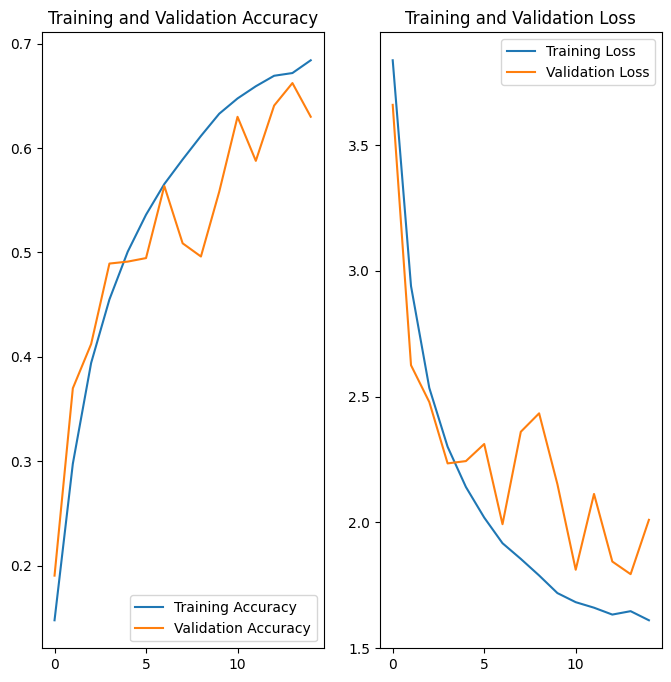

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_hub as hub

# Check if a GPU is available and set the device accordingly
if tf.test.gpu_device_name():
    print('GPU found')
    device = '/device:GPU:0'  # Use the first GPU
else:
    print('No GPU found')
    device = '/device:CPU:0'

m = None
# Use `with tf.device(device):` to scope operations to the specified device
with tf.device(device):

    path = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

    model_hub = hub.KerasLayer(path, input_shape=(224,224,3), trainable=True)

    num_class = 167
    model = Sequential()
    model.add(model_hub)
    model.add(layers.Dense(1000,activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1000,activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=num_class, activation="softmax"))


    model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])


    model.summary()

    epochs=30
    history = model.fit(
      train,
      validation_data=val,
      epochs=epochs
    )
    m = model

GPU found
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_9 (Dense)             (None, 1000)              1002000   
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_10 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_7 (Dropout)         (None, 1000)              0         
                                                                 
 dense_11 (Dense)            (None, 167)               167167    
                                                                 
Total params: 5710432 (21.78 MB)
Trainable p

In [ ]:
model.save('mobilenet-30-epochs.keras')

In [ ]:
loss, accuracy = model.evaluate(test)

217/217 [==============================] - 69s 46ms/step - loss: 2.1584 - accuracy: 0.6460


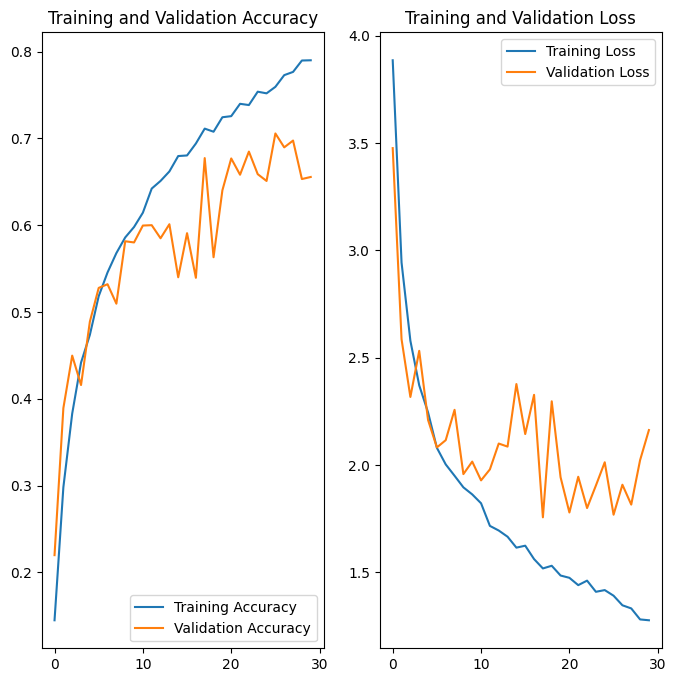

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()